In [49]:
import os
print(os.listdir("titanic_data"))


['Titanic-Dataset.csv']


In [48]:
df = pd.read_csv("titanic_data/Titanic-Dataset.csv")


In [40]:
import os
import pandas as pd

folder = "titanic_data"
files = os.listdir(folder)
csv_files = [f for f in files if f.endswith(".csv")]

if csv_files:
    df = pd.read_csv(os.path.join(folder, csv_files[0]))
    print("Loaded:", csv_files[0])
    print(df.head())
else:
    print(" No CSV file found in", folder)


Loaded: Titanic-Dataset.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [43]:
columns_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId']
df.drop([col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()

if 'Sex' in df.columns:
    df['Sex'] = le.fit_transform(df['Sex'])

if 'Embarked' in df.columns:
    df['Embarked'] = le.fit_transform(df['Embarked'])


In [44]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

log = LogisticRegression(max_iter=200)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)


In [45]:
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Random Forest Results:
Accuracy: 0.8212290502793296
[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Logistic Regression Results:
Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



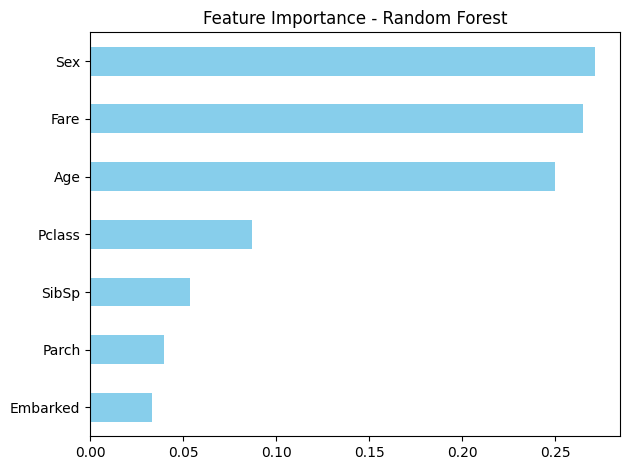

In [46]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()
